# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(queryURL + city).json()

{
    "cod": "404",
    "message": "city not found"
}


In [4]:
# set up empty lists for needed characters
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#start processing record at 1
processingRecord = 1

print("Beginning Data Retrieval")
print("-------------------------")

# loop through each city
for city in cities:
    
#Exception handling
    try:
        response = requests.get(queryURL + city).json()
        city_id.append(response['id'])
        city_name.append(response['name']) 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cityResponse = response['name']
        print(f"Processing Record {processingRecord} of Set 1 | {cityResponse}")
              
        # increment processing record
        processingRecord +=1
    
    except:
        print("city not found. Skipping ...")
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | Barrow
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Vaini
Processing Record 4 of Set 1 | Shimoda
Processing Record 5 of Set 1 | Bethel
Processing Record 6 of Set 1 | Namanga
Processing Record 7 of Set 1 | Rosário do Sul
Processing Record 8 of Set 1 | Mayo
Processing Record 9 of Set 1 | Qaanaaq
Processing Record 10 of Set 1 | Castro
Processing Record 11 of Set 1 | Tura
Processing Record 12 of Set 1 | Kavieng
Processing Record 13 of Set 1 | Punta Arenas
city not found. Skipping ...
Processing Record 14 of Set 1 | Busselton
city not found. Skipping ...
Processing Record 15 of Set 1 | Port Alfred
city not found. Skipping ...
Processing Record 16 of Set 1 | Ushuaia
Processing Record 17 of Set 1 | Paidha
Processing Record 18 of Set 1 | Cascais
Processing Record 19 of Set 1 | Lubumbashi
Processing Record 20 of Set 1 | Kaitangata
Processing Record 21 of Set 1 | Chicla
city not found. Skip

city not found. Skipping ...
Processing Record 184 of Set 1 | Saldanha
Processing Record 185 of Set 1 | Touros
city not found. Skipping ...
Processing Record 186 of Set 1 | Carutapera
Processing Record 187 of Set 1 | Isla Vista
Processing Record 188 of Set 1 | Qasigiannguit
city not found. Skipping ...
Processing Record 189 of Set 1 | Santiago
city not found. Skipping ...
Processing Record 190 of Set 1 | Saint-Paul
Processing Record 191 of Set 1 | Tomatlán
city not found. Skipping ...
city not found. Skipping ...
Processing Record 192 of Set 1 | Lumphat
Processing Record 193 of Set 1 | Vao
Processing Record 194 of Set 1 | Naze
city not found. Skipping ...
city not found. Skipping ...
Processing Record 195 of Set 1 | Cherskiy
Processing Record 196 of Set 1 | Vila
Processing Record 197 of Set 1 | New Glasgow
Processing Record 198 of Set 1 | Avarua
city not found. Skipping ...
Processing Record 199 of Set 1 | Boca do Acre
Processing Record 200 of Set 1 | Fairbanks
Processing Record 201 of

Processing Record 362 of Set 1 | Mishkino
Processing Record 363 of Set 1 | Tuatapere
Processing Record 364 of Set 1 | Vetlanda
Processing Record 365 of Set 1 | Tanabe
Processing Record 366 of Set 1 | Praia da Vitória
Processing Record 367 of Set 1 | Najrān
Processing Record 368 of Set 1 | Acurenam
Processing Record 369 of Set 1 | Orlik
Processing Record 370 of Set 1 | Russell
Processing Record 371 of Set 1 | Alice Springs
Processing Record 372 of Set 1 | Winton
Processing Record 373 of Set 1 | Wenling
Processing Record 374 of Set 1 | Bulgan
Processing Record 375 of Set 1 | Richards Bay
Processing Record 376 of Set 1 | Dwārka
Processing Record 377 of Set 1 | Pudozh
Processing Record 378 of Set 1 | Kashgar
Processing Record 379 of Set 1 | Kutum
Processing Record 380 of Set 1 | Dhidhdhoo
city not found. Skipping ...
Processing Record 381 of Set 1 | Hobyo
Processing Record 382 of Set 1 | Maniwaki
Processing Record 383 of Set 1 | Hamilton
Processing Record 384 of Set 1 | Maragogi
Processing

city not found. Skipping ...
Processing Record 549 of Set 1 | Kumano
Processing Record 550 of Set 1 | Júlio de Castilhos
Processing Record 551 of Set 1 | Yangambi
Processing Record 552 of Set 1 | Benicarló
Processing Record 553 of Set 1 | Andilamena
Processing Record 554 of Set 1 | Taltal


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weatherDict = {
    "City ID":city_id, 
    "City Name":city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Date":date, 
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng, 
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
}
weatherDict = pd.DataFrame(weatherDict)
weatherDict.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,5880054,Barrow,0,US,1658378208,76,71.2906,-156.7887,46.42,13.80
1,4030556,Rikitea,0,PF,1658378100,76,-23.1203,-134.9692,73.53,6.02
2,4032243,Vaini,20,TO,1658378339,83,-21.2000,-175.2000,77.16,8.05
3,1852357,Shimoda,79,JP,1658378187,79,34.6667,138.9500,82.76,5.53
4,5282297,Bethel,0,US,1658378116,82,41.3712,-73.4140,79.63,3.49


In [22]:
weatherDict.count()

City ID            554
City Name          554
Cloudiness         554
Country            554
Date               554
Humidity           554
Latitude           554
Longitude          554
Max Temperature    554
Wind Speed         554
dtype: int64

In [17]:
weatherDict.to_csv("output_data/weatherDict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
maxHumid = weatherDict.loc[weatherDict['Humidity'] != 100]
#del maxHumid


City ID            546
City Name          546
Cloudiness         546
Country            546
Date               546
Humidity           546
Latitude           546
Longitude          546
Max Temperature    546
Wind Speed         546
dtype: int64

In [26]:
#  Get the indices of cities that have humidity over 100%.
maxHumid.count()

99

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [27]:
maxHumid.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,5880054,Barrow,0,US,1658378208,76,71.2906,-156.7887,46.42,13.80
1,4030556,Rikitea,0,PF,1658378100,76,-23.1203,-134.9692,73.53,6.02
2,4032243,Vaini,20,TO,1658378339,83,-21.2000,-175.2000,77.16,8.05
3,1852357,Shimoda,79,JP,1658378187,79,34.6667,138.9500,82.76,5.53
4,5282297,Bethel,0,US,1658378116,82,41.3712,-73.4140,79.63,3.49


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

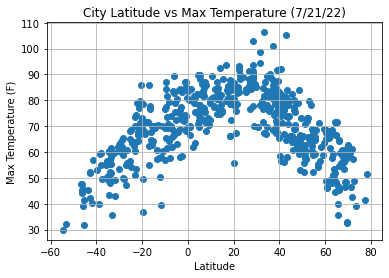

In [30]:
plt.scatter(maxHumid["Latitude"], maxHumid["Max Temperature"])
plt.title("City Latitude vs Max Temperature (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

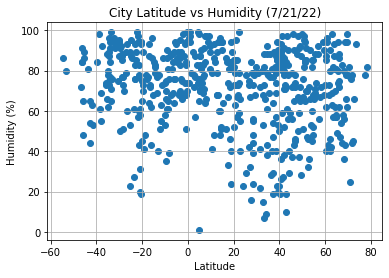

In [31]:
plt.scatter(maxHumid["Latitude"], maxHumid["Humidity"])
plt.title("City Latitude vs Humidity (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

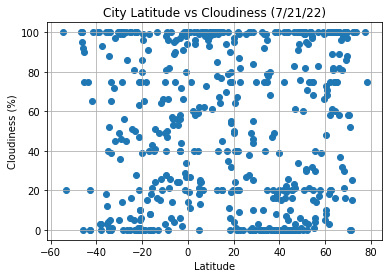

In [32]:
plt.scatter(maxHumid["Latitude"], maxHumid["Cloudiness"])
plt.title("City Latitude vs Cloudiness (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

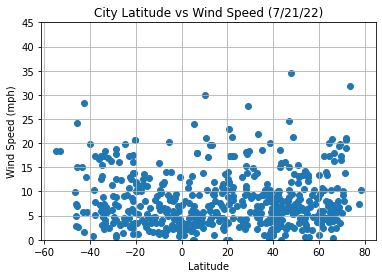

In [34]:
plt.scatter(maxHumid["Latitude"], maxHumid["Wind Speed"])
plt.title("City Latitude vs Wind Speed (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,45)
plt.grid()
plt.show()

## Linear Regression

In [42]:
north = maxHumid['Latitude'] >= 0
northernHem = maxHumid[north]
southernHem = maxHumid[~north]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.4244279304188061


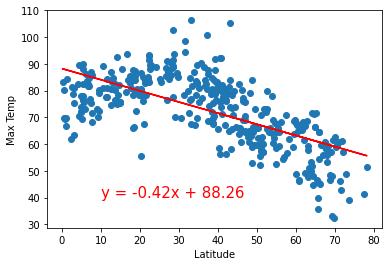

In [78]:
x_values = northernHem['Latitude']
y_values = northernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5498887345065093


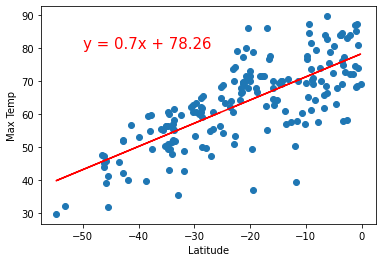

In [79]:
x_values = southernHem['Latitude']
y_values = southernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.008284034436210461


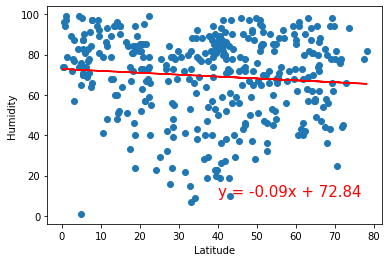

In [85]:
x_values = northernHem['Latitude']
y_values = northernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0004133680413989884


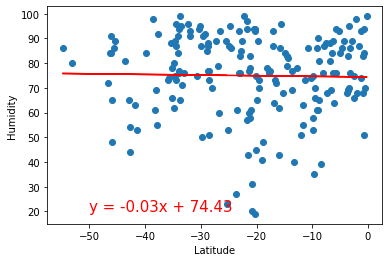

In [84]:
x_values = southernHem['Latitude']
y_values = southernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 2.7220567530530233e-08


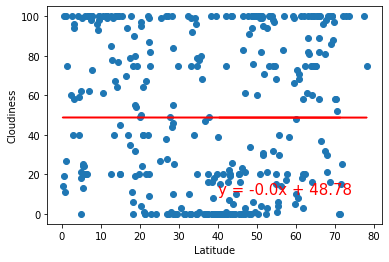

In [86]:
x_values = northernHem['Latitude']
y_values = northernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.00019565164643354393


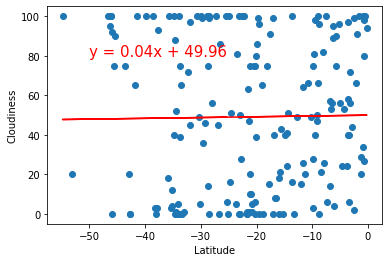

In [87]:
x_values = southernHem['Latitude']
y_values = southernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.008427632252024244


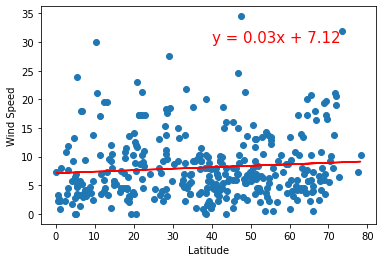

In [89]:
x_values = northernHem['Latitude']
y_values = northernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.08173660993682715


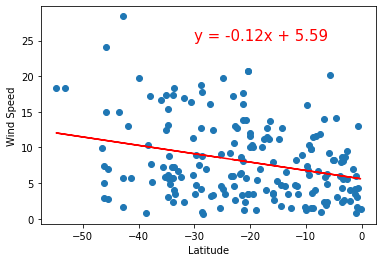

In [91]:
x_values = southernHem['Latitude']
y_values = southernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.show()